In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importação de Dados

In [ ]:
# Caminho dos dados
path = ""

In [ ]:
# Importação dos dados
df = pd.read_csv(path+"MICRODADOS_ENEM_2021.csv", sep=";")
df.shape

(1885722, 77)

# Pré-processamento dos dados

In [ ]:
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [ ]:
# Seleção de variáveis não equivalentes. 
# Algumas variáveis são equivalentes, como por exemplo nome e código da cidade, representando o mesmo parâmetro: cidade.
# Foram selecionada as colunas com variáveis distintas. 

columns = ['NO_MUNICIPIO_ESC',
           'SG_UF_ESC',
           'TP_LOCALIZACAO_ESC',
           'TP_DEPENDENCIA_ADM_ESC',
           'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 
           'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 
           'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 
           'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 
           'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
           'NU_NOTA_CN',
           'NU_NOTA_CH',
           'NU_NOTA_LC',
           'NU_NOTA_MT',
           'NU_NOTA_REDACAO',
           ] 
df = df[columns]
df.head(5)

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q005,Q006,...,Q021,Q022,Q023,Q024,Q025,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,F,F,B,B,3.0,D,...,A,B,A,B,B,NaN,574.6,472.6,NaN,760.0
1,NaN,NaN,NaN,NaN,B,B,B,B,3.0,B,...,A,C,A,A,A,505.9,551.8,498.3,461.5,560.0
2,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,...,A,C,B,B,B,NaN,NaN,NaN,NaN,NaN
3,Crato,CE,1.0,2.0,B,B,B,B,6.0,B,...,A,B,A,B,B,580.7,678.9,638.9,659.5,780.0
4,Redeno,CE,1.0,2.0,D,E,F,D,4.0,C,...,B,E,A,B,B,497.7,532.4,457.6,582.6,780.0


In [ ]:
# Removendo linhas completamente nulas
df = df.dropna(axis=0,how='all')
df.shape

(1885722, 34)

In [ ]:
# Quantidade de valores nulos por variável
for column in df.columns:
  count_na = df[column].isna().sum()
  print(column, count_na)

NO_MUNICIPIO_ESC 1358651
SG_UF_ESC 1358651
TP_LOCALIZACAO_ESC 1358651
TP_DEPENDENCIA_ADM_ESC 1358651
Q001 1
Q002 1
Q003 1
Q004 2
Q005 2
Q006 2
Q007 2
Q008 2
Q009 2
Q010 2
Q011 2
Q012 2
Q013 2
Q014 2
Q015 2
Q016 2
Q017 2
Q018 2
Q019 2
Q020 2
Q021 2
Q022 2
Q023 2
Q024 2
Q025 2
NU_NOTA_CN 494953
NU_NOTA_CH 426835
NU_NOTA_LC 426835
NU_NOTA_MT 494953
NU_NOTA_REDACAO 426835


# Medidas resumo 

In [ ]:
# Média total das notas (Ciências Naturais, Ciências Humanas, Linguagem, Matemática, Redação)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
nota_list= ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
df[nota_list].mean(axis=0)

NU_NOTA_CN        492.64
NU_NOTA_CH        522.04
NU_NOTA_LC        503.59
NU_NOTA_MT        536.94
NU_NOTA_REDACAO   629.73
dtype: float64

In [ ]:
# Média, desvio, mínimo, quantis (25%, 50%, 75%), máximo 
df[columns].describe()

,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q005,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,527071.00,527071.00,1885720.00,1390769.00,1458887.00,1458887.00,1390769.00,1458887.00
mean,1.03,2.46,3.78,492.64,522.04,503.59,536.94,629.73
std,0.18,0.94,1.35,82.24,96.00,79.58,111.99,190.99
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,3.00,430.50,447.30,448.20,445.20,540.00
50%,1.00,2.00,4.00,481.40,523.60,506.50,515.90,620.00
75%,1.00,4.00,4.00,547.20,591.30,559.90,616.30,760.00
max,2.00,4.00,20.00,867.10,846.90,826.10,953.10,1000.00


In [ ]:
df[nota_list]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,574.60,472.60,NaN,760.00
1,505.90,551.80,498.30,461.50,560.00
2,NaN,NaN,NaN,NaN,NaN
3,580.70,678.90,638.90,659.50,780.00
4,497.70,532.40,457.60,582.60,780.00
...,...,...,...,...,...
1885717,453.10,417.00,454.60,432.60,620.00
1885718,592.30,NaN,NaN,738.20,NaN
1885719,531.40,381.60,455.10,530.60,600.00
1885720,530.30,459.60,560.20,695.40,760.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c9a9776d0>,
      dtype=object)

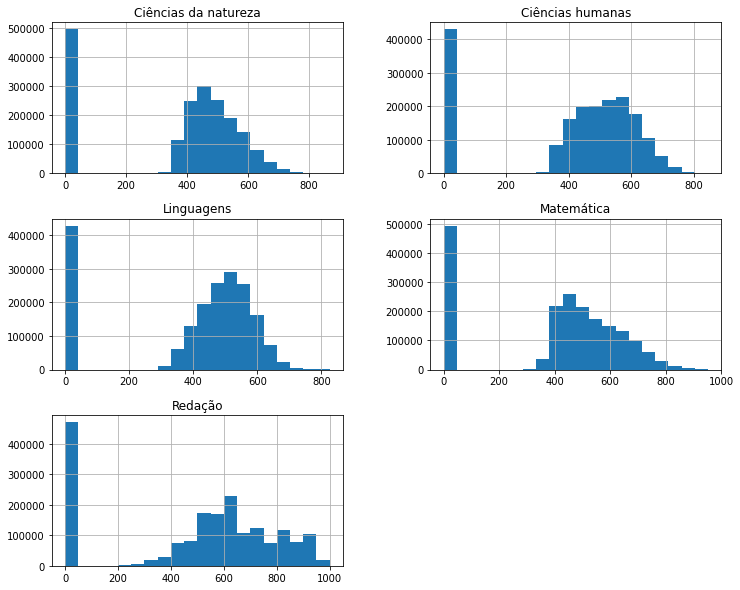

In [ ]:
#ax = df[nota_list].hist(bins=20,figsize=(12, 10))
df_notas = pd.DataFrame(df[nota_list]).fillna(0)
df_notas.columns=['Ciências da natureza','Ciências humanas','Linguagens','Matemática','Redação']
df_notas.hist(bins=20,figsize=(12, 10))

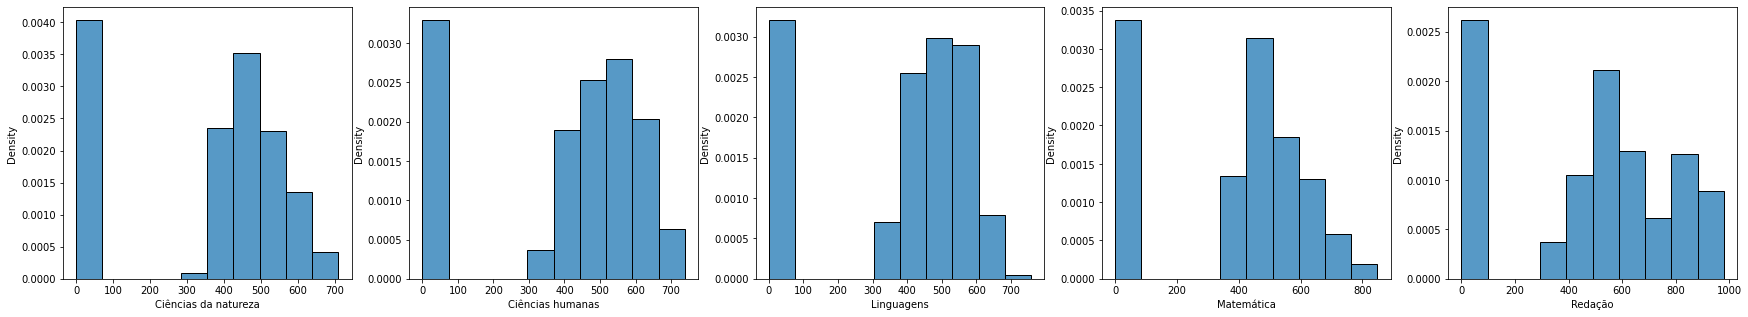

In [ ]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(30,10))
fig,ax = plt.subplots(1,5,figsize=(30,5))
i=0
#fig=sns.kdeplot(data=df_notas, common_norm=False)
for nota in df_notas.columns:
  fig=sns.histplot(data=df_notas[nota][:300], common_norm=False, stat="density",multiple="dodge",bins=10, ax=ax[i])
  i+=1
plt.savefig('histogramas_notas.png')

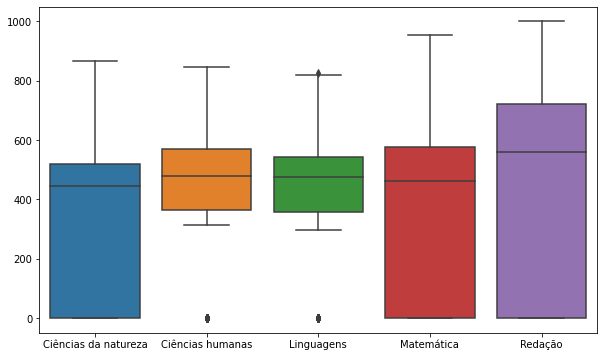

In [ ]:
# Boxplot

plt.figure(figsize = (10,6))
#for nota in df_notas.columns:
fig = sns.boxplot(data=df_notas)
#plt.savefig('boxplot_notas.png')

In [ ]:
# Divisão da notas por bins 
for nota in nota_list:
  df[nota+'_bin'] = pd.cut(df[nota], bins = [0,200,400,600,800,1000])


# Avaliação das notas em relação à esfera de administração das escolas

In [ ]:
# Rótulos da variável 
adm_dict = {1:'Federal',
            2:'Estadual', 
            3:'Municipal',
            4:'Privada'}
df = df.replace({"TP_DEPENDENCIA_ADM_ESC":adm_dict})
df.head(2)

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q005,Q006,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_CN_bin,NU_NOTA_CH_bin,NU_NOTA_LC_bin,NU_NOTA_MT_bin,NU_NOTA_REDACAO_bin
0,NaN,NaN,NaN,NaN,F,F,B,B,3.00,D,...,NaN,574.60,472.60,NaN,760.00,NaN,"(400, 600]","(400, 600]",NaN,"(600, 800]"
1,NaN,NaN,NaN,NaN,B,B,B,B,3.00,B,...,505.90,551.80,498.30,461.50,560.00,"(400.0, 600.0]","(400, 600]","(400, 600]","(400.0, 600.0]","(400, 600]"


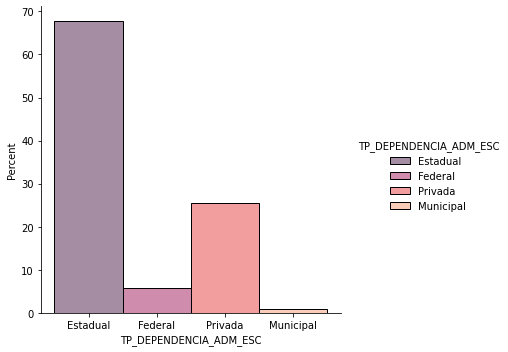

In [ ]:
fig = sns.displot(df, x="TP_DEPENDENCIA_ADM_ESC", hue="TP_DEPENDENCIA_ADM_ESC", 
            stat="percent", common_norm=True,  element="bars",
            palette="rocket")

In [ ]:
# Porcentagem de estudantes por administração
df_count_adm = pd.DataFrame(df["TP_DEPENDENCIA_ADM_ESC"].value_counts()).reset_index()
df_count_adm.columns=["adm", "count_alunos"]
df_count_adm["percent_alunos"] = (df_count_adm["count_alunos"]/df_count_adm["count_alunos"].sum())*100
df_count_adm

,adm,count_alunos,percent_alunos
0,Estadual,357141,67.76
1,Privada,135016,25.62
2,Federal,30734,5.83
3,Municipal,4180,0.79


In [ ]:
df[df['TP_DEPENDENCIA_ADM_ESC'] == 'Federal']['NU_NOTA_LC_bin'].value_counts()

(400, 600]     21508
(600, 800]      6178
(200, 400]       805
(800, 1000]        2
(0, 200]           0
Name: NU_NOTA_LC_bin, dtype: int64

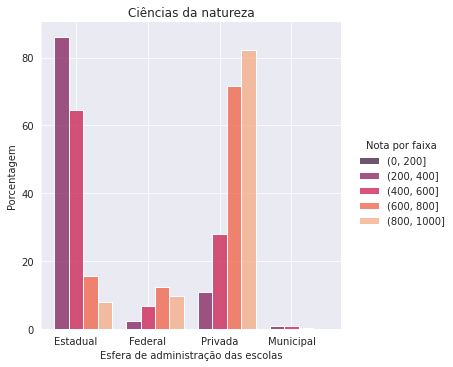

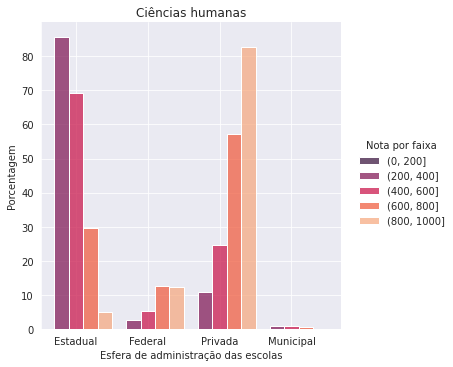

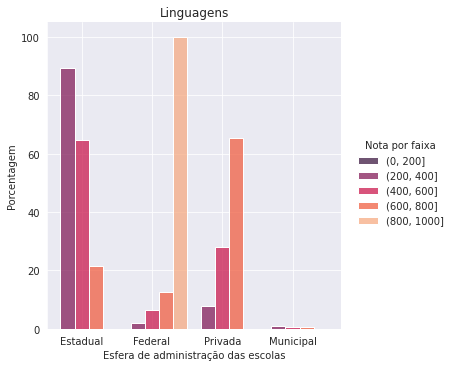

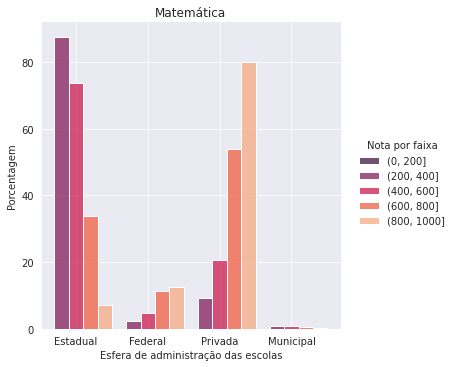

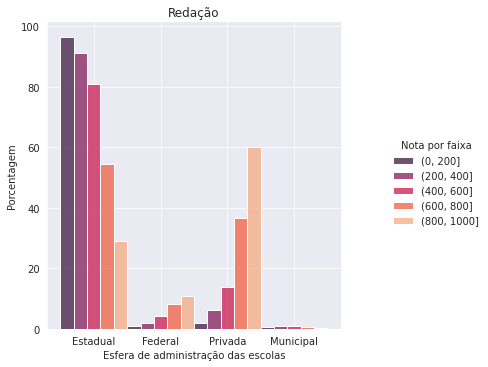

In [ ]:
# Distribuição total por tipo de administração das escolas

i=0
values_list = []
notas = ['Ciências da natureza','Ciências humanas','Linguagens','Matemática','Redação']

for nota in nota_list:

  # Gráfico de distribuição por faixa de nota
  sns.set_style("darkgrid")
  fig = sns.displot(df, x="TP_DEPENDENCIA_ADM_ESC", hue=nota+'_bin', 
              stat="percent", common_norm=False,  multiple="dodge", element="bars",
              palette="rocket")
  
  # Ajustando as legendas
  fig._legend.set_title("Nota por faixa")
  fig.set(xlabel='Esfera de administração das escolas', ylabel="Porcentagem", title=notas[i])
  i+=1

  # Salva os valores da porcentagem
  values_list.append([(h.get_height()).round(3) for h in fig.ax.patches])

  fig.savefig(nota+"_administracao_escolas.png")

In [ ]:
# Valores de densidade por faixa de nota redação

df_infos = pd.DataFrame(columns = ['adm','count_alunos','percent_alunos',
                         'percent_nota_0_200', 'percent_nota_200_400', 'percent_nota_400_600',	'percent_nota_600_800',	'percent_nota_800_1000',
                         'nota'])
i=0
for value in values_list:

  # Tabela de valores por faixa
  density_adm = (pd.DataFrame(np.array_split(value, 5),columns = ["Estadual","Federal","Privada", "Municipal"])).transpose().reset_index()
  density_adm.columns=["adm",'percent_nota_0_200','percent_nota_200_400','percent_nota_400_600','percent_nota_600_800','percent_nota_800_1000']
  density_adm = density_adm.fillna(0) # Retornando a 0 valores trasformados em nan
  
  # Merge com a tabela de porcentagem total
  df_adm = pd.merge(df_count_adm, density_adm, on="adm")
  df_adm['nota'] = notas[i]
  i+=1
 
  # concatena con a tabela de informações total
  df_infos = pd.concat([df_infos, df_adm])

In [ ]:
df_infos.head(6)

,adm,count_alunos,percent_alunos,percent_nota_0_200,percent_nota_200_400,percent_nota_400_600,percent_nota_600_800,percent_nota_800_1000,nota
0,Estadual,357141,67.76,7.84,15.68,0.35,28.00,2.34,Ciências da natureza
1,Privada,135016,25.62,82.35,71.65,6.64,86.10,0.83,Ciências da natureza
2,Federal,30734,5.83,9.80,12.32,64.56,0.80,10.73,Ciências da natureza
3,Municipal,4180,0.79,0.00,0.00,0.00,0.00,0.00,Ciências da natureza
0,Estadual,357141,67.76,4.90,29.69,0.53,24.49,2.68,Ciências humanas
1,Privada,135016,25.62,82.84,57.31,5.34,85.71,0.71,Ciências humanas


In [ ]:
# Densidade de notas ponderada pelo número de alunos

faixas = ['percent_nota_0_200','percent_nota_200_400','percent_nota_400_600','percent_nota_600_800','percent_nota_800_1000']
pond_list_name = []
for column in faixas:
  df_adm["ponderada_"+column[8:]] = (df_adm.percent_alunos * df_adm[column])/100
  pond_list_name.append("ponderada_"+column[8:])
df_ponde = df_adm[["adm"]+pond_list_name]
df_ponde.set_index('adm', inplace=True)

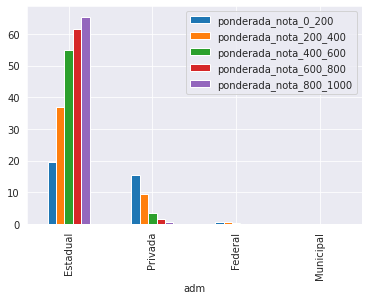

In [ ]:
df_ponde.plot.bar()

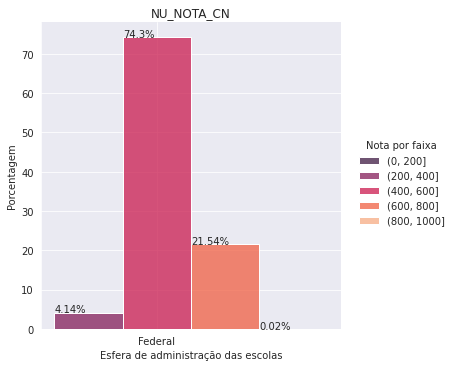

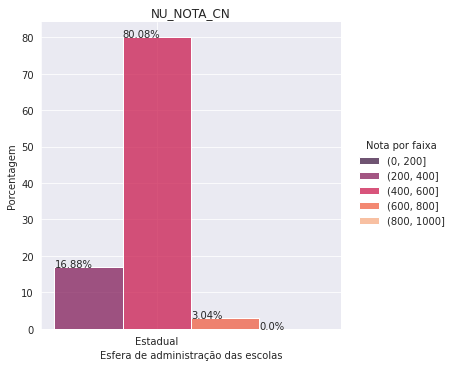

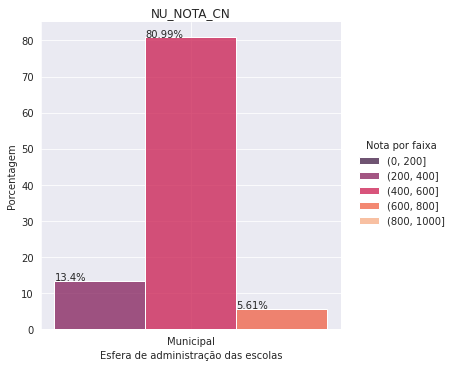

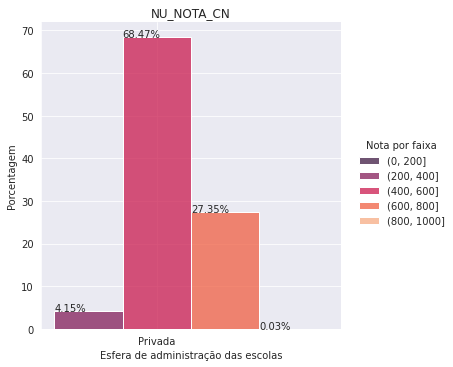

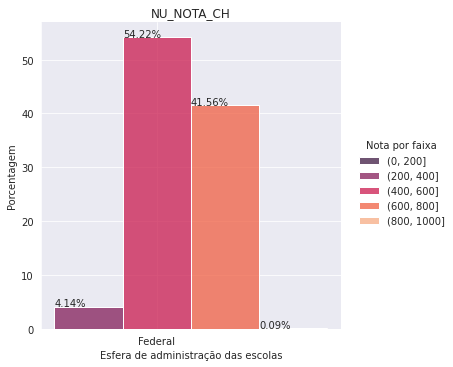

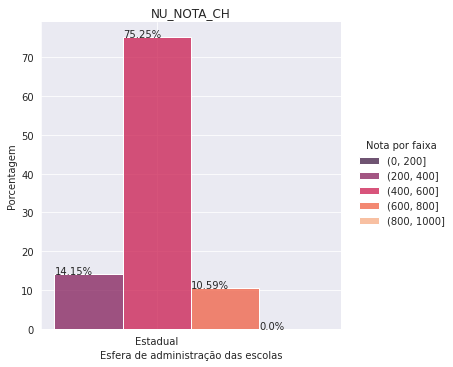

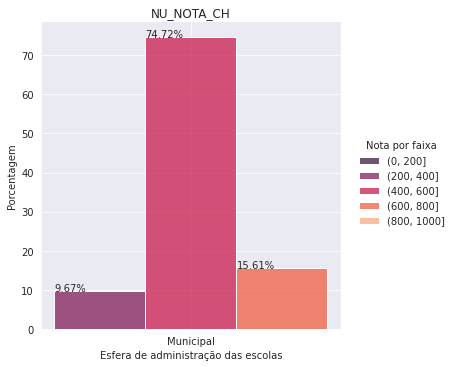

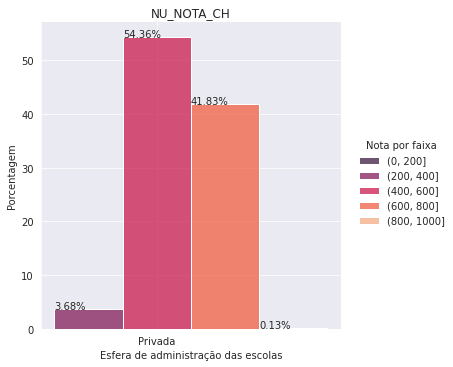

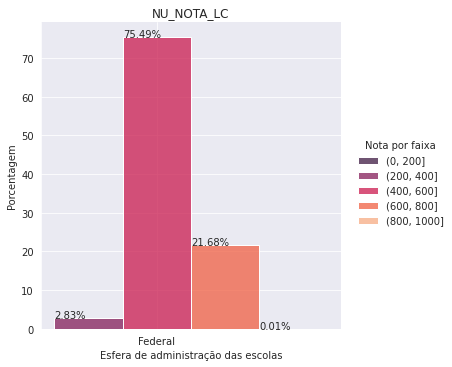

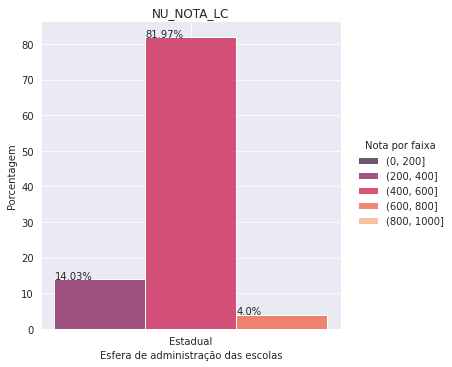

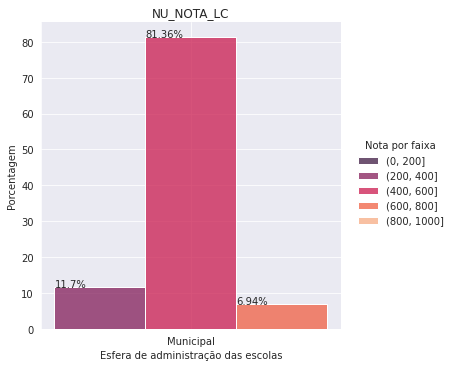

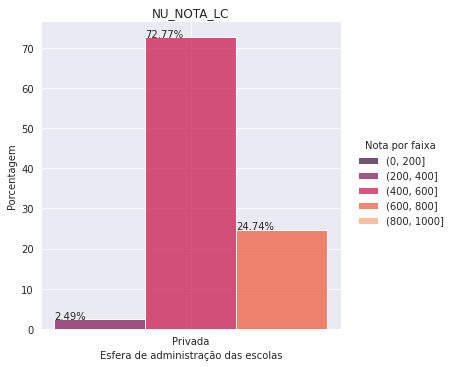

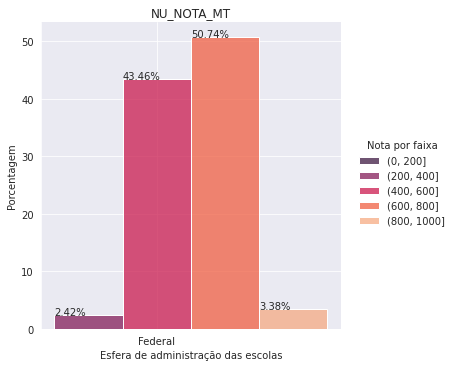

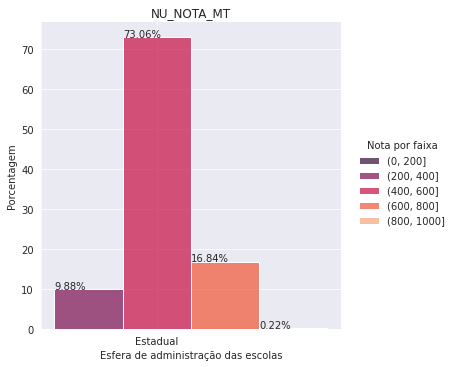

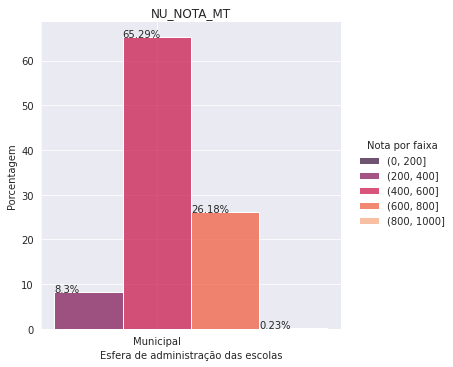

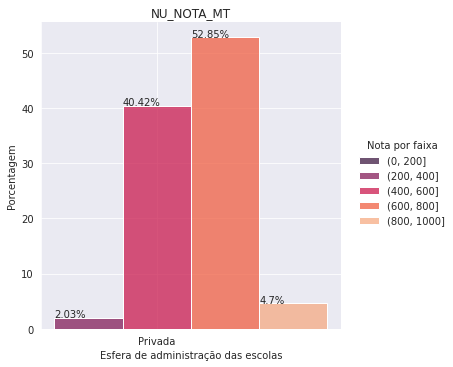

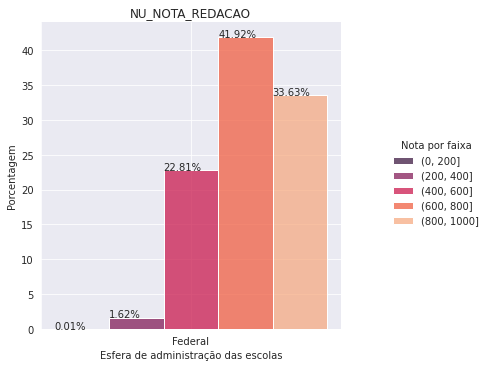

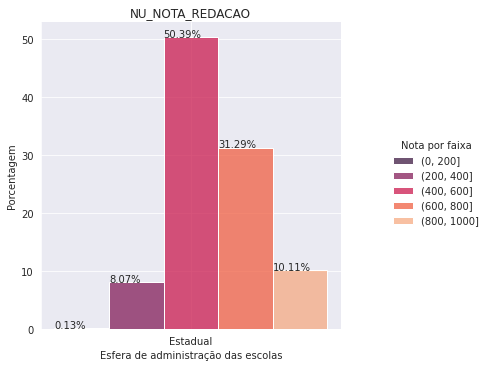

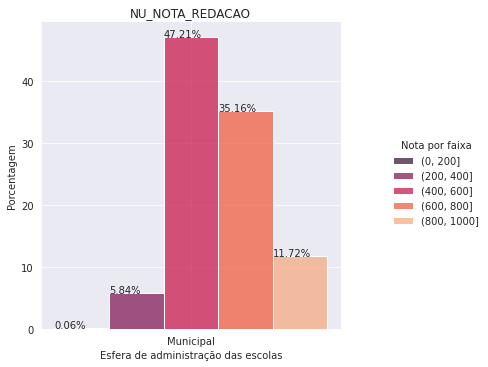

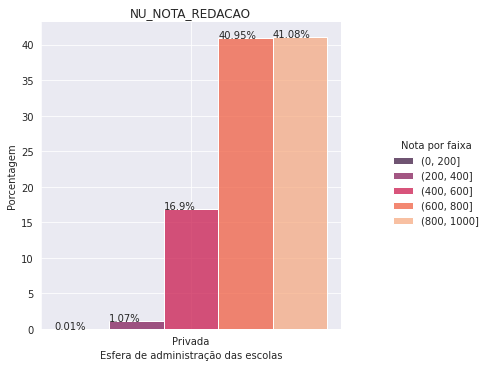

In [ ]:
# Porcentagem de notas por cada administração. 

sns.set_style("darkgrid")

adm_list = ["Federal","Estadual","Municipal","Privada"]
notas = ['Ciências da natureza','Ciências humanas','Linguagens','Matemática','Redação']

for nota in nota_list:
  for adm in adm_list:
    fig = sns.displot(df[df["TP_DEPENDENCIA_ADM_ESC"]==adm], x="TP_DEPENDENCIA_ADM_ESC", hue=nota+"_bin", 
                stat="percent",  multiple="dodge", element="bars",
                palette="rocket")
    fig._legend.set_title("Nota por faixa")
    fig.ax.set(xlabel='Esfera de administração das escolas', ylabel="Porcentagem", title=nota)

    for p in fig.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.ax.text(txt_x,txt_y,txt)

    fig.savefig(nota+'_'+adm+'.png')




# Avaliação das notas em relação à região geográfica

In [ ]:
label_dict = {2:'Rural',
            1:'Urbana'
            }
df = df.replace({"TP_LOCALIZACAO_ESC":label_dict})
df.head(2)

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q005,Q006,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_CN_bin,NU_NOTA_CH_bin,NU_NOTA_LC_bin,NU_NOTA_MT_bin,NU_NOTA_REDACAO_bin
0,NaN,NaN,NaN,NaN,F,F,B,B,3.00,D,...,NaN,574.60,472.60,NaN,760.00,NaN,"(400, 600]","(400, 600]",NaN,"(600, 800]"
1,NaN,NaN,NaN,NaN,B,B,B,B,3.00,B,...,505.90,551.80,498.30,461.50,560.00,"(400.0, 600.0]","(400, 600]","(400, 600]","(400.0, 600.0]","(400, 600]"


In [ ]:
# Distribuição total por tipo de administração das escolas
import matplotlib.pyplot as plt

i=0
values_list = []

notas = ['Ciências da natureza','Ciências humanas','Linguagens','Matemática','Redação']
fig, ax = plt.subplots(1,5,figsize=(32,6))
for nota in nota_list:

  # Gráfico de distribuição por faixa de nota
  sns.set_style("darkgrid")
  sns.histplot(df[:1000],x='TP_LOCALIZACAO_ESC',hue=df[nota], bins=20,stat="percent",common_norm=False,
              palette="husl", multiple="dodge", ax=ax[i])#"rocket")  
  # Ajustando as legendas
  #fig._legend.set_title("Nota por faixa")
  #fig.set(xlabel='Zona de localização da escola', ylabel="Porcentagem", title=notas[i])
  i+=1

  # Salva os valores da porcentagem
  #values_list.append([(h.get_height()).round(3) for h in fig.ax.patches])
plt.show()
fig.savefig(nota+"_rural_ou_urbana2.png")

In [ ]:
# Porcentagem de notas por cada administração. 

sns.set_style("darkgrid")

adm_list = ["Rural","Urbana"]
notas = ['Ciências da natureza','Ciências humanas','Linguagens','Matemática','Redação']

for nota in nota_list:
  for adm in adm_list:
    fig = sns.displot(df[df['TP_LOCALIZACAO_ESC']==adm], x='TP_LOCALIZACAO_ESC', hue=nota+'_bin', 
                stat="percent",  multiple="dodge", element="bars",
                palette="husl")
    fig._legend.set_title("Nota por faixa")
    fig.ax.set(xlabel='Zona de localização da escola', ylabel="Porcentagem", title=nota)

    for p in fig.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.ax.text(txt_x,txt_y,txt)
    #fig.savefig(nota+'_'+adm+'.png')

#Avaliação das notas em relação à região geográfica

In [ ]:
# Rótulos da variável
label_dict = {2:'Rural',
            1:'Urbana'
            }
df = df.replace({"TP_LOCALIZACAO_ESC":label_dict})
df.head(2)

# Avaliação das notas em relação à escolaridade da mãe 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

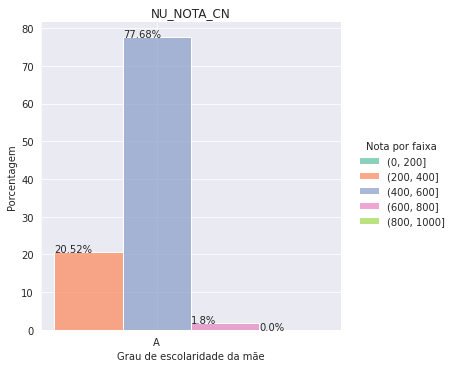

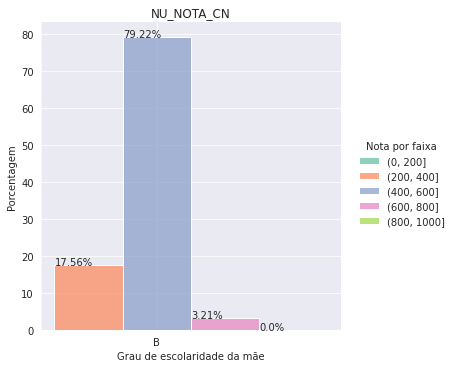

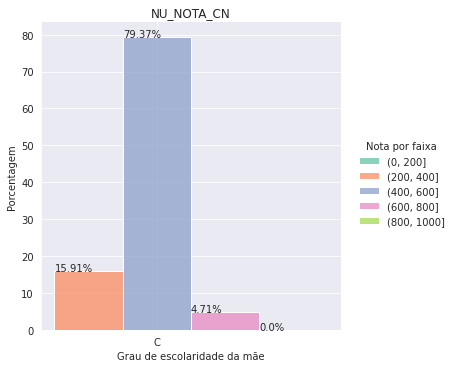

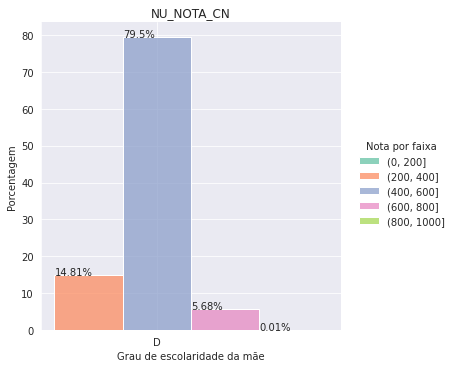

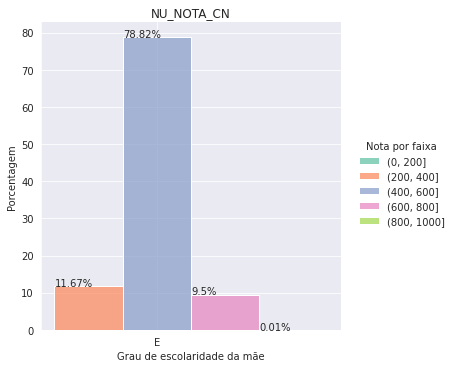

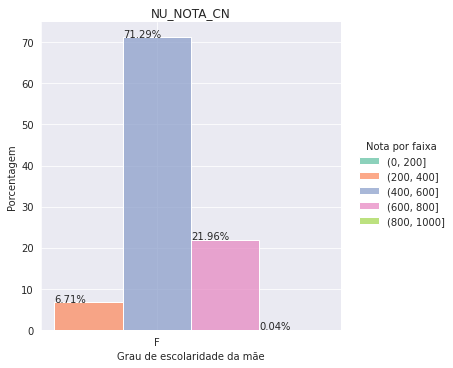

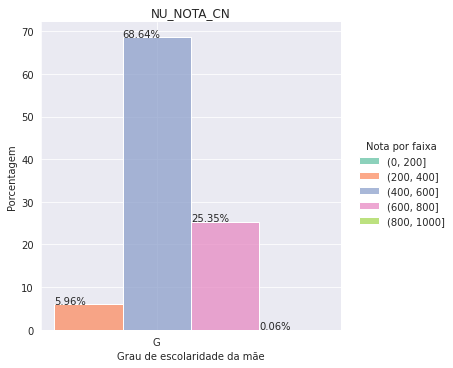

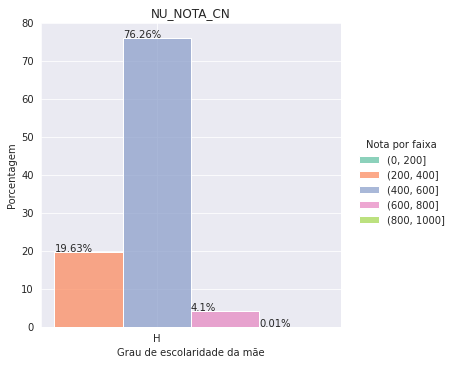

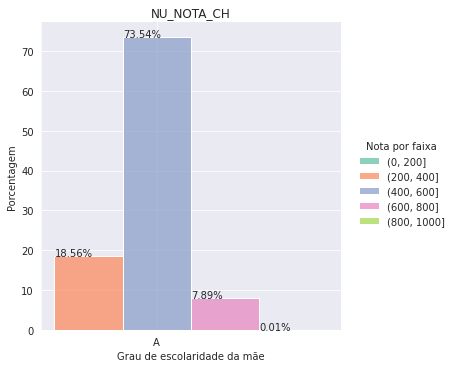

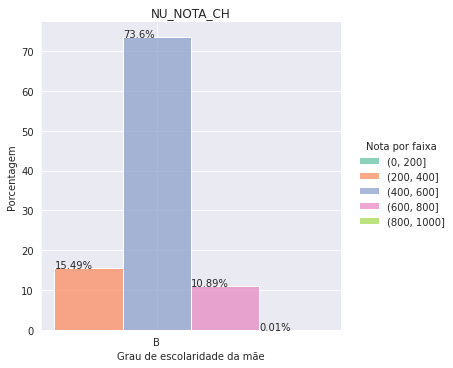

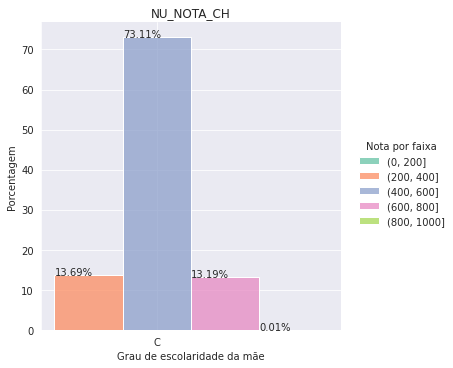

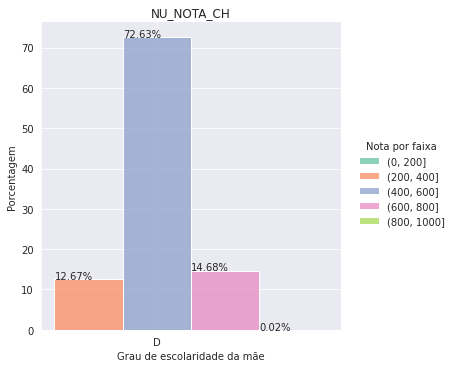

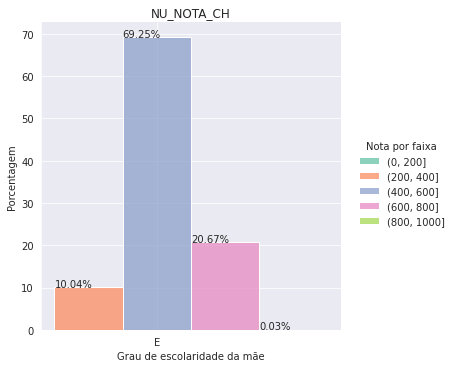

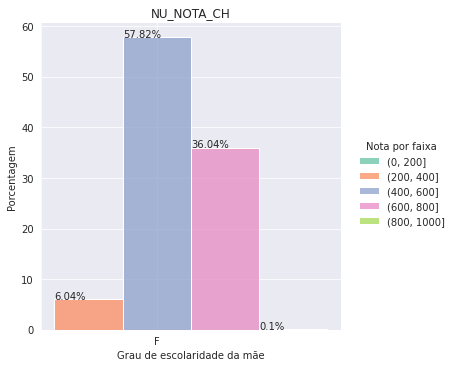

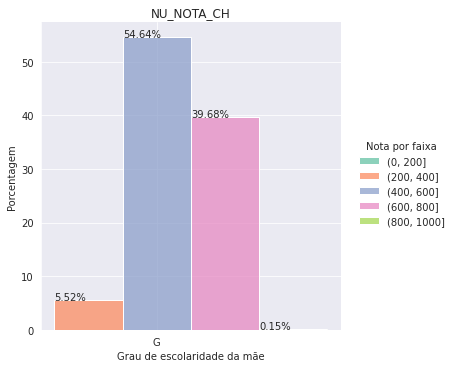

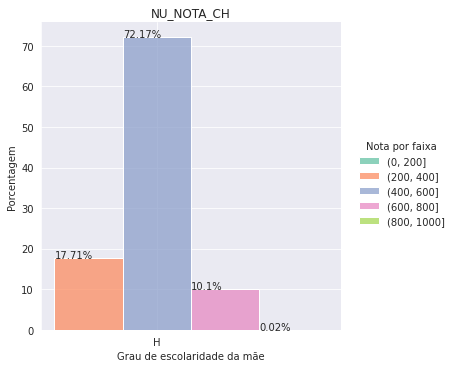

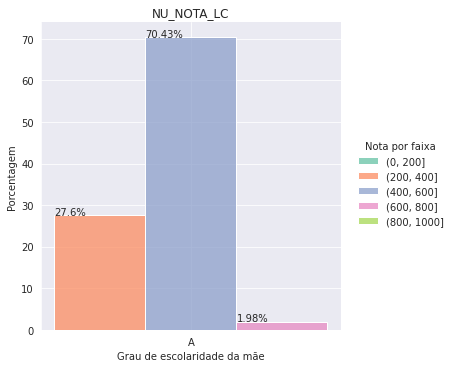

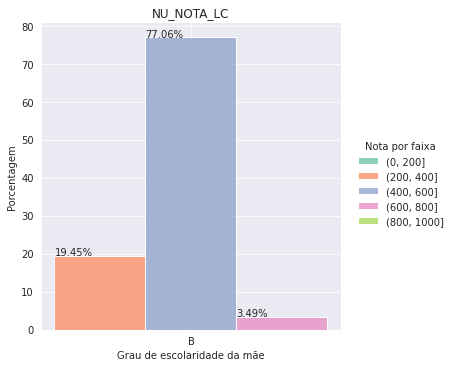

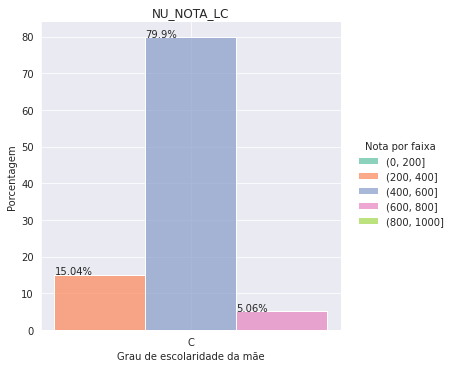

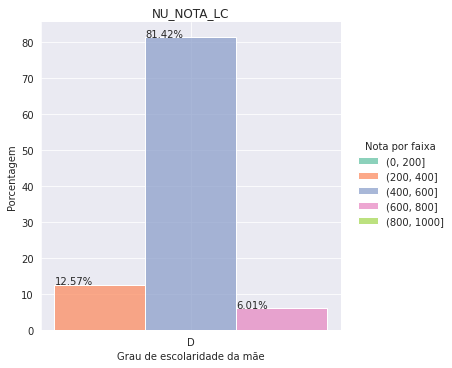

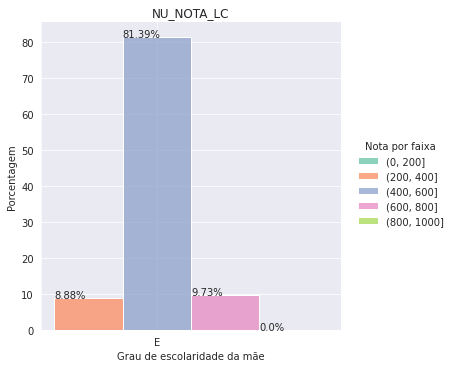

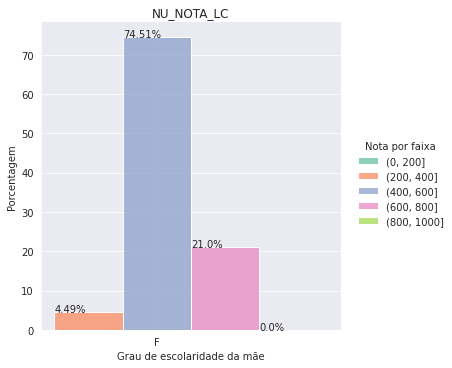

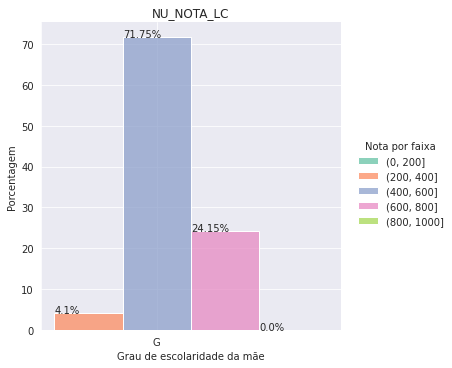

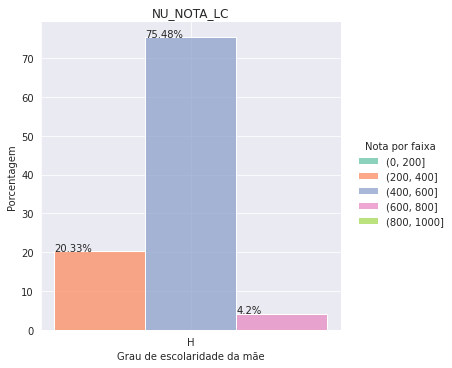

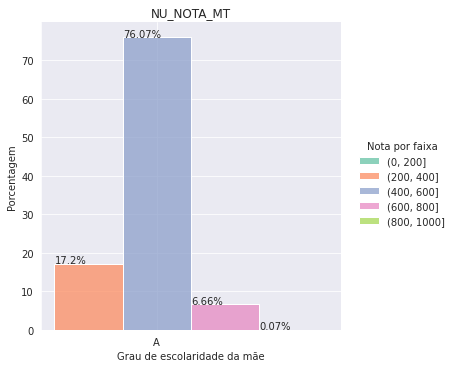

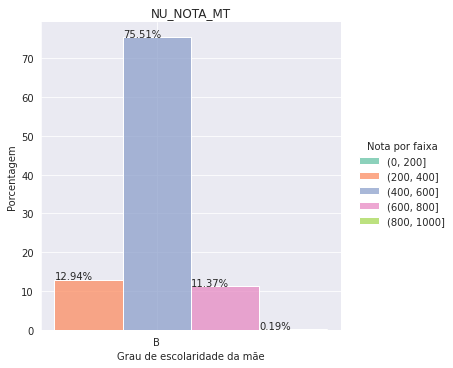

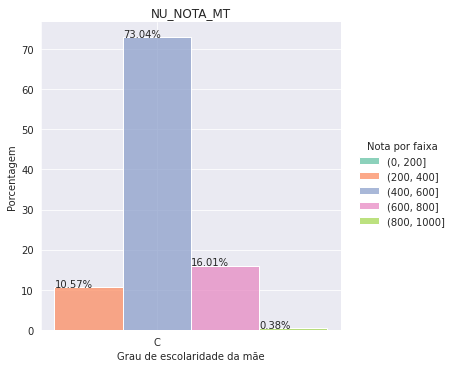

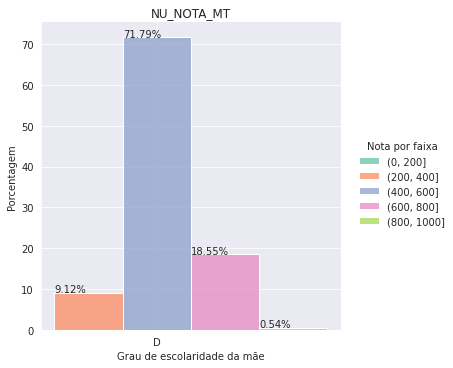

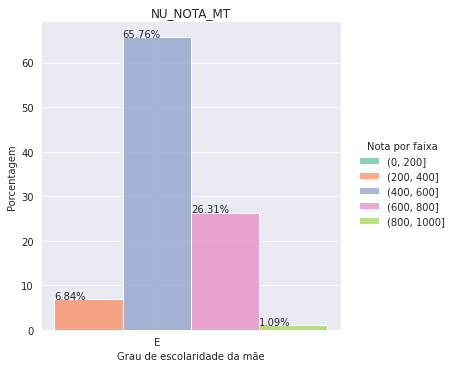

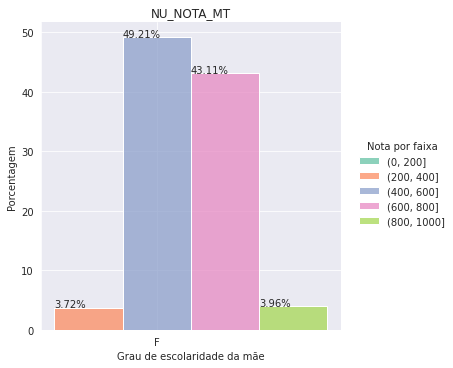

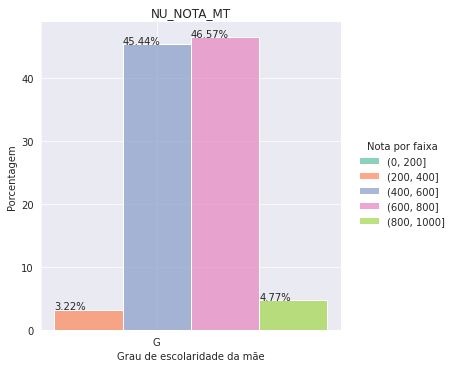

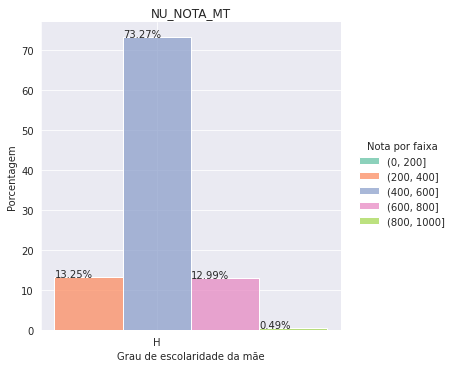

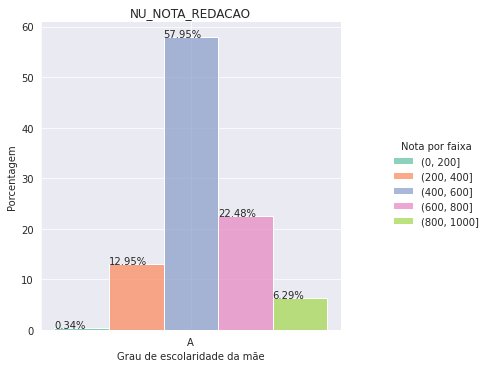

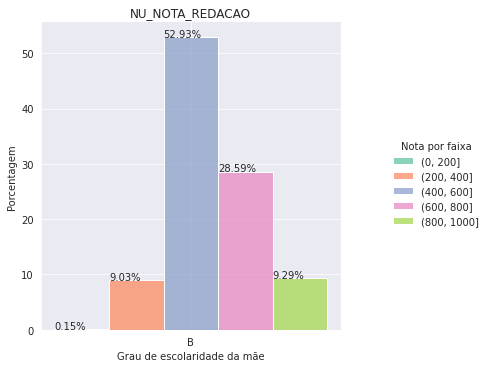

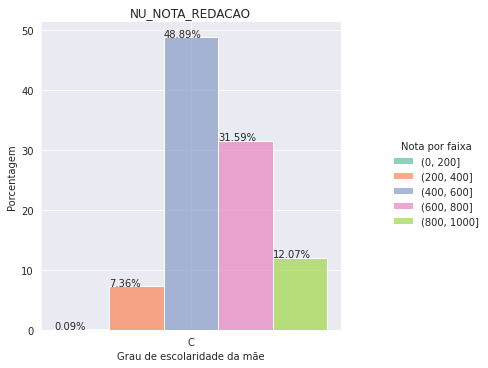

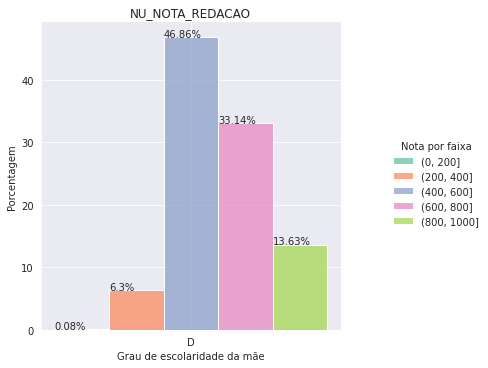

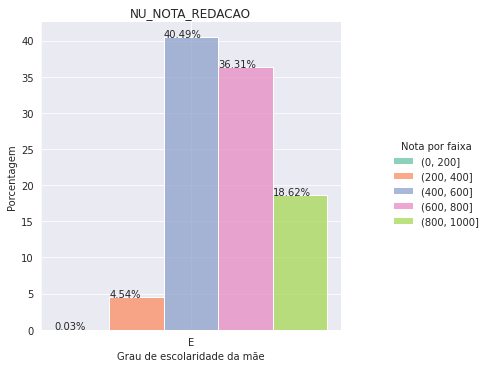

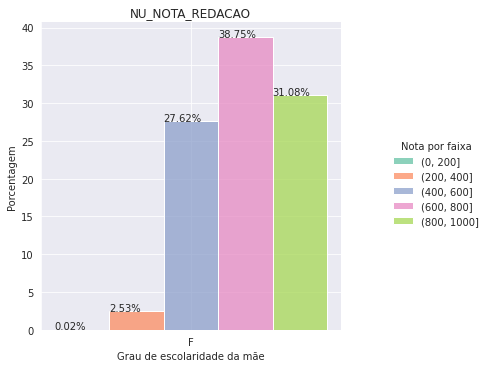

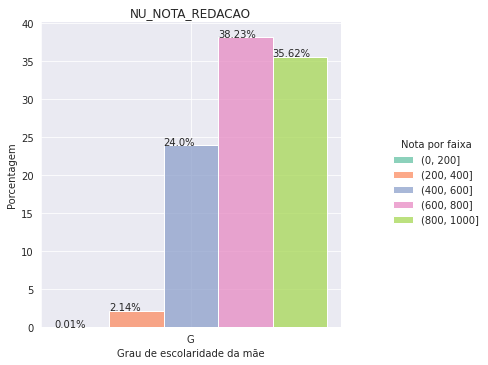

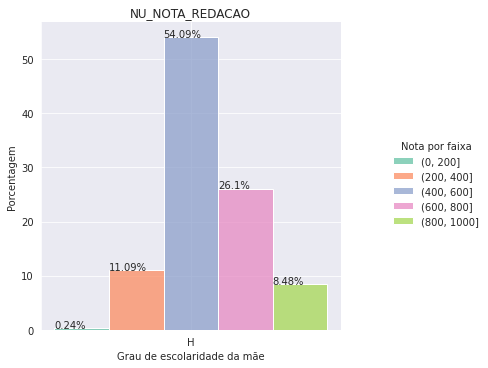

In [ ]:
# Porcentagem de notas por cada administração. 

sns.set_style("darkgrid")

adm_list = ["A","B","C","D","E","F","G","H"]
notas = ['Ciências da natureza','Ciências humanas','Linguagens','Matemática','Redação']

for nota in nota_list:
  for adm in adm_list:
    fig = sns.displot(df[df["Q002"]==adm], x="Q002", hue=nota+"_bin", 
                stat="percent",  multiple="dodge", element="bars",
                palette="Set2")
    fig._legend.set_title("Nota por faixa")
    fig.ax.set(xlabel='Grau de escolaridade da mãe', ylabel="Porcentagem", title=nota)

    for p in fig.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.ax.text(txt_x,txt_y,txt)

    #fig.savefig(nota+'_escolaridademae_'+adm+'.png')


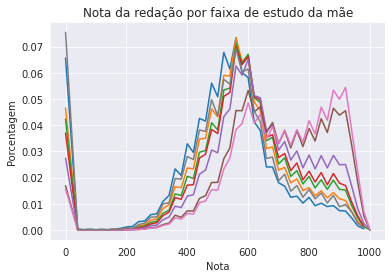

In [ ]:
# porncentagem em relação as notas por faixa de estudo 
sns.color_palette("flare")
label_list =["A","B","C","D","E","F","G","H"]

for label in label_list:

  df_i = pd.DataFrame(df[df["Q002"]==label].NU_NOTA_REDACAO.value_counts()).reset_index()
  df_i.columns=["nota",'count']
  total = df_i["count"].sum()
  df_i["count_percent"] = df_i["count"]/total


  fig.set(xlabel='Nota', ylabel="Porcentagem", title='Nota da redação por faixa de estudo da mãe')
  fig=sns.lineplot(data=df_i, x="nota", y="count_percent")